数据来源：苹果App Store中app的相关信息。  
**目标**：通过各个指标对app的使用情况进行分析，更清楚了解用户行为习惯，为进一步制定营销策略提供依据。  
数据集字段：
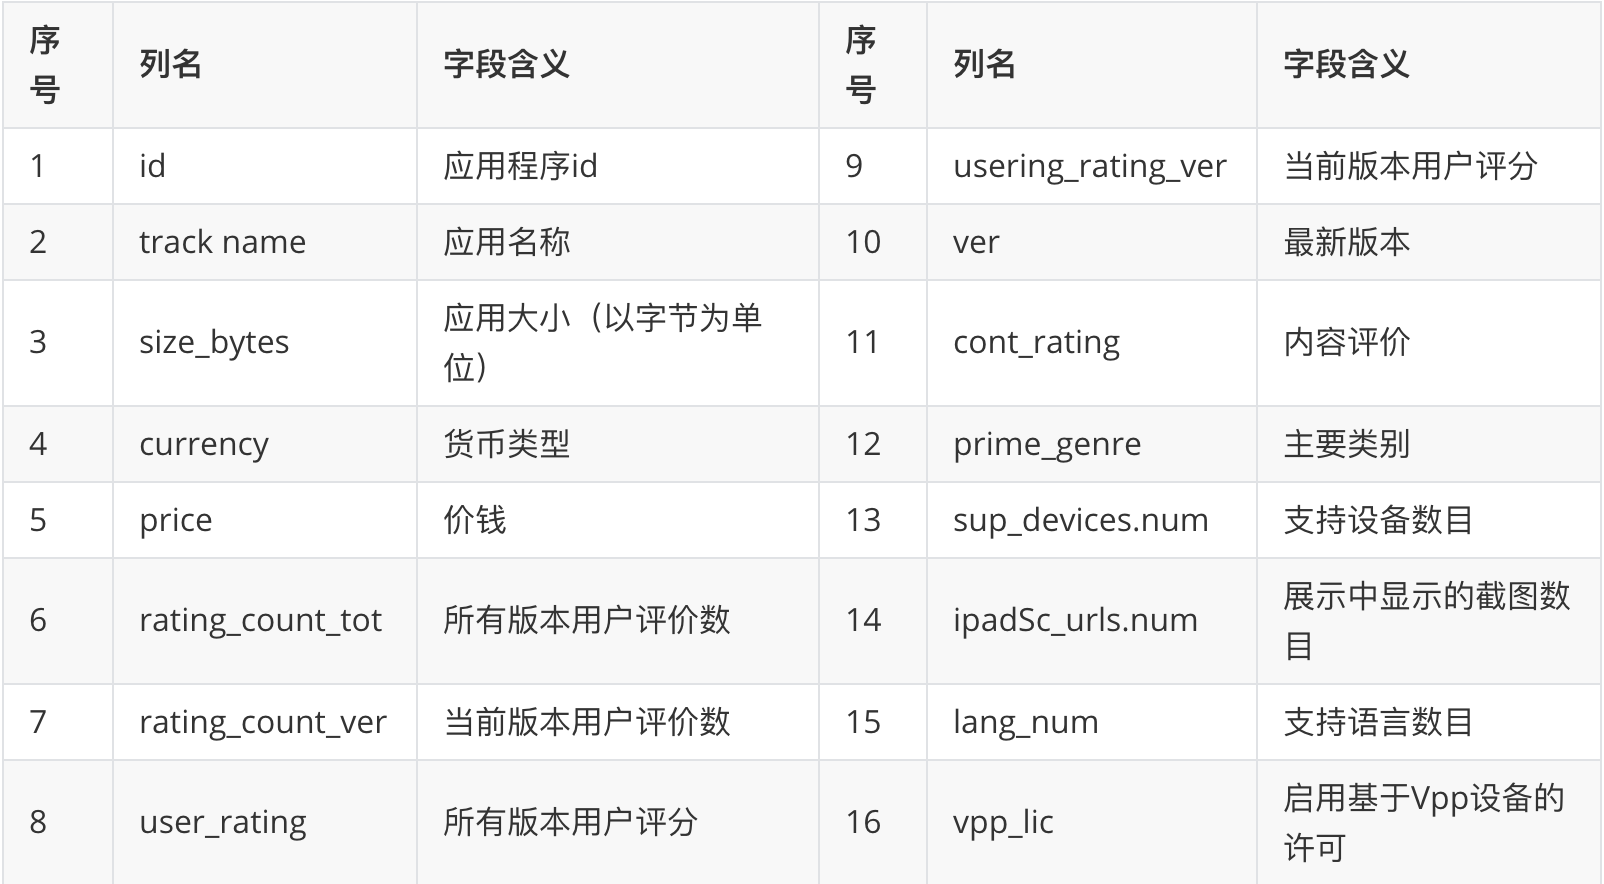

## 1. 准备内容

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import time
import matplotlib as mpl 
import seaborn as sns
import pyecharts
import PIL.Image as image
import matplotlib.ticker as mtick  
from pyecharts.charts import Bar
from pyecharts import options as opts
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
file_path = 'AppStore.csv'
data = pd.read_csv(file_path) 
data

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,1.007882e+08,USD,3.99,21292.0,26.0,4,4.5,6.3.5,4+,Games,38,5,10.0,1.0
1,281796108,Evernote - stay organized,1.585787e+08,USD,0.00,161065.0,26.0,4,3.5,8.2.2,4+,Productivity,37,5,23.0,1.0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",1.005240e+08,USD,0.00,188583.0,2822.0,3.5,4.5,5.0.0,4+,Weather,37,5,3.0,1.0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",1.285120e+08,USD,0.00,262241.0,649.0,4,4.5,5.10.0,12+,Shopping,37,5,9.0,1.0
4,282935706,Bible,9.277440e+07,USD,0.00,985920.0,5320.0,4.5,5,7.5.1,4+,Reference,37,5,45.0,1.0
5,283619399,Shanghai Mahjong,1.048571e+07,USD,0.99,8253.0,5516.0,4,4,1.8,4+,Games,47,5,1.0,1.0
6,283646709,PayPal - Send and request money safely,2.277960e+08,USD,0.00,119487.0,879.0,4,4.5,6.12.0,4+,Finance,37,0,19.0,1.0
7,284035177,Pandora - Music & Radio,1.302426e+08,USD,0.00,1126879.0,3594.0,4,4.5,8.4.1,12+,Music,37,4,1.0,1.0
8,284666222,PCalc - The Best Calculator,4.925030e+07,USD,9.99,1117.0,4.0,4.5,5,3.6.6,4+,Utilities,37,5,1.0,1.0
9,284736660,Ms. PAC-MAN,7.002317e+07,USD,3.99,7885.0,40.0,4,4,4.0.4,4+,Games,38,0,10.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null float64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null float64
rating_count_ver    7197 non-null float64
user_rating         7197 non-null object
user_rating_ver     7197 non-null object
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            6667 non-null float64
vpp_lic             6667 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 899.7+ KB


## 2. 数据预处理

### 1. 数据清洗

In [4]:
# 检查数据是否有缺失值
data.isnull().sum()

id                    0
track_name            0
size_bytes            0
currency              0
price                 0
rating_count_tot      0
rating_count_ver      0
user_rating           0
user_rating_ver       0
ver                   0
cont_rating           0
prime_genre           0
sup_devices.num       0
ipadSc_urls.num       0
lang.num            530
vpp_lic             530
dtype: int64

In [5]:
data["prime_genre"].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment', '0',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', '5', 'News', 'Book', 'Medical', '1', '4', '3',
       'Catalogs', '2'], dtype=object)

In [6]:
df=data[data["prime_genre"].isin(["0","1","2","3","4","5"])]
df

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
36,290807369,"Line Rider iRideâ„?,1646592,USD""",1.99,21609,69.0,3.5,2.5,2.4,9+,Entertainment,40,0,1,1,NaN,NaN
67,298867247,"Chase Mobileâ„?,39505920,USD""",0.00,233270,14625.0,4.5,4.5,2.61,4+,Finance,37,0,2,1,NaN,NaN
68,299029654,"å¤§è¾žæž?,210088960,USD""",21.99,64,0.0,4.5,0.0,4.1.1,4+,Reference,37,5,2,1,NaN,NaN
70,299853944,æ–°æµªæ–°é—»-é˜…è¯»æœ€æ–°æ—¶äº‹çƒ­é—¨å¤´æ¡èµ„...,0.00,2229,4.0,3.5,1.0,6.2.1,17+,News,37,0,1,1,NaN,NaN
84,303191318,"åŒèŠ±é¡?ç‚’è‚¡ã€è‚¡ç¥?,122886144,USD""",0.00,1744,0.0,3.5,0.0,10.10.46,4+,Finance,37,0,1,1,NaN,NaN
124,310303959,"World Cup Table Tennisâ„?,31387648,USD""",0.99,17776,6.0,4.0,5.0,4.6.1,4+,Games,37,0,11,1,NaN,NaN
204,329981776,"Sudokuâ?,1608704,USD""",2.99,18332,1007.0,4.5,5.0,3.4,4+,Games,37,5,2,1,NaN,NaN
333,356968629,ãƒ¤ãƒ•ã‚ªã‚¯! åˆ©ç”¨è€…æ•°NO.1ã®ã‚ªãƒ¼ã‚¯ã‚·ã...,0.00,9,0.0,3.0,0.0,6.14.0,17+,Shopping,37,0,1,1,NaN,NaN
354,363448251,"Photogene â?,35422208,USD""",2.99,3761,596.0,4.5,4.5,4.3,4+,Photo & Video,40,5,1,1,NaN,NaN
402,369970819,"Fake-A-Location Free â„?,7689537,USD""",0.00,354,215.0,1.5,1.0,1.01,4+,Social Networking,43,0,1,1,NaN,NaN


In [7]:
data = data.drop(df.index)

In [8]:
data

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,1.007882e+08,USD,3.99,21292.0,26.0,4,4.5,6.3.5,4+,Games,38,5,10.0,1.0
1,281796108,Evernote - stay organized,1.585787e+08,USD,0.00,161065.0,26.0,4,3.5,8.2.2,4+,Productivity,37,5,23.0,1.0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",1.005240e+08,USD,0.00,188583.0,2822.0,3.5,4.5,5.0.0,4+,Weather,37,5,3.0,1.0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",1.285120e+08,USD,0.00,262241.0,649.0,4,4.5,5.10.0,12+,Shopping,37,5,9.0,1.0
4,282935706,Bible,9.277440e+07,USD,0.00,985920.0,5320.0,4.5,5,7.5.1,4+,Reference,37,5,45.0,1.0
5,283619399,Shanghai Mahjong,1.048571e+07,USD,0.99,8253.0,5516.0,4,4,1.8,4+,Games,47,5,1.0,1.0
6,283646709,PayPal - Send and request money safely,2.277960e+08,USD,0.00,119487.0,879.0,4,4.5,6.12.0,4+,Finance,37,0,19.0,1.0
7,284035177,Pandora - Music & Radio,1.302426e+08,USD,0.00,1126879.0,3594.0,4,4.5,8.4.1,12+,Music,37,4,1.0,1.0
8,284666222,PCalc - The Best Calculator,4.925030e+07,USD,9.99,1117.0,4.0,4.5,5,3.6.6,4+,Utilities,37,5,1.0,1.0
9,284736660,Ms. PAC-MAN,7.002317e+07,USD,3.99,7885.0,40.0,4,4,4.0.4,4+,Games,38,0,10.0,1.0


## 3. 数据分析

### 1. app共有多少种类型，每种类型各有多少个app

In [9]:
a = data["prime_genre"].value_counts()
a

Games                3600
Entertainment         496
Education             428
Photo & Video         346
Utilities             230
Productivity          174
Health & Fitness      174
Social Networking     148
Music                 137
Lifestyle             119
Sports                109
Shopping              107
Book                   75
Finance                73
Travel                 73
Weather                72
News                   64
Reference              59
Food & Drink           57
Business               54
Navigation             41
Medical                22
Catalogs                9
Name: prime_genre, dtype: int64

In [10]:
a.values.astype(int).sum()

6667

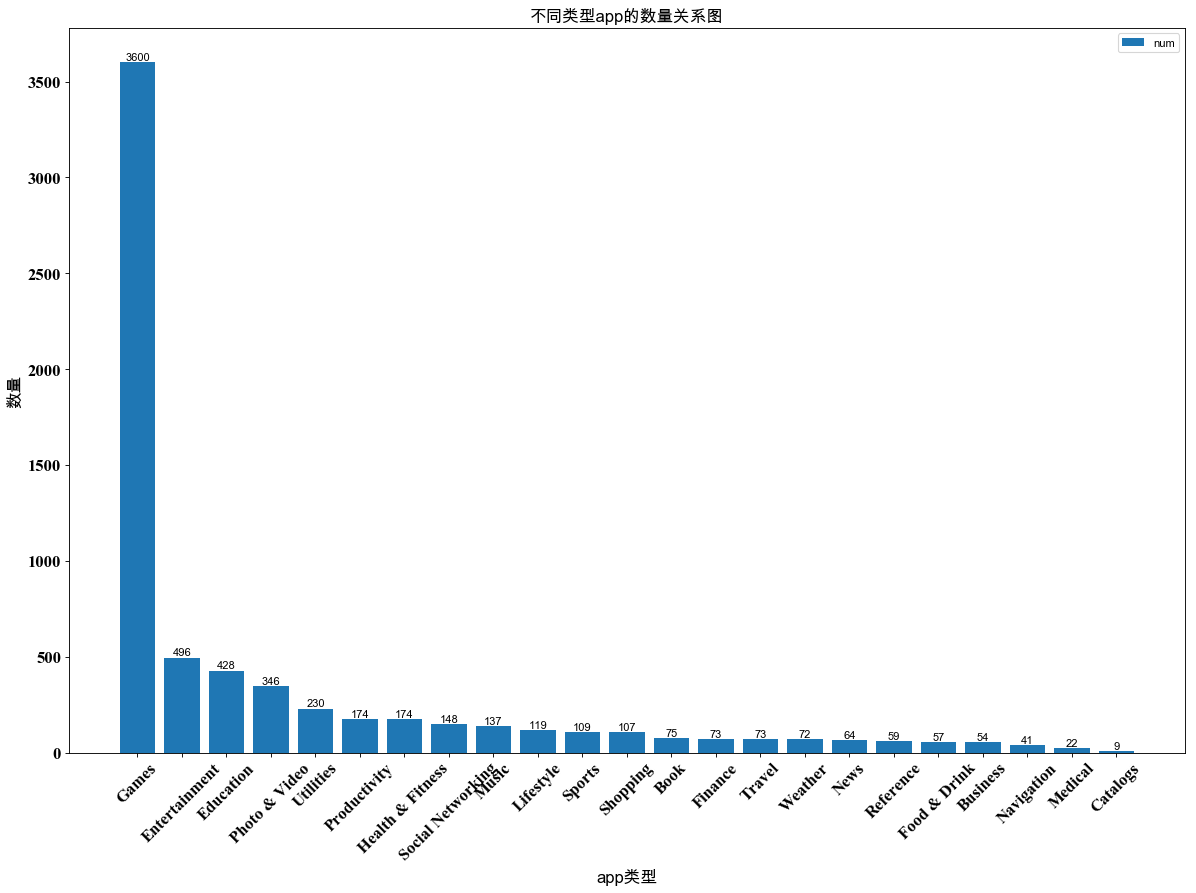

In [11]:
plt.figure(figsize=(18, 12), dpi=80)
p = plt.bar(a.index, a.values, label="num")
for x,y in zip(a.index,a.values):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom')
plt.xlabel('app类型',size = 15)
plt.xticks(rotation=45,fontproperties = 'Times New Roman',size =15)
plt.ylabel('数量',size = 15)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.title('不同类型app的数量关系图' ,size = 15)
plt.legend(loc="upper right")
plt.show()

In [12]:
a1 = a[:12]
a2 = a[12:]
a2.sum()

599

In [13]:
a3 = pd.Series(['599'],index = ['其他'])
a3

其他    599
dtype: object

In [14]:
a = a1.append(a3)
a

Games                3600
Entertainment         496
Education             428
Photo & Video         346
Utilities             230
Productivity          174
Health & Fitness      174
Social Networking     148
Music                 137
Lifestyle             119
Sports                109
Shopping              107
其他                    599
dtype: object

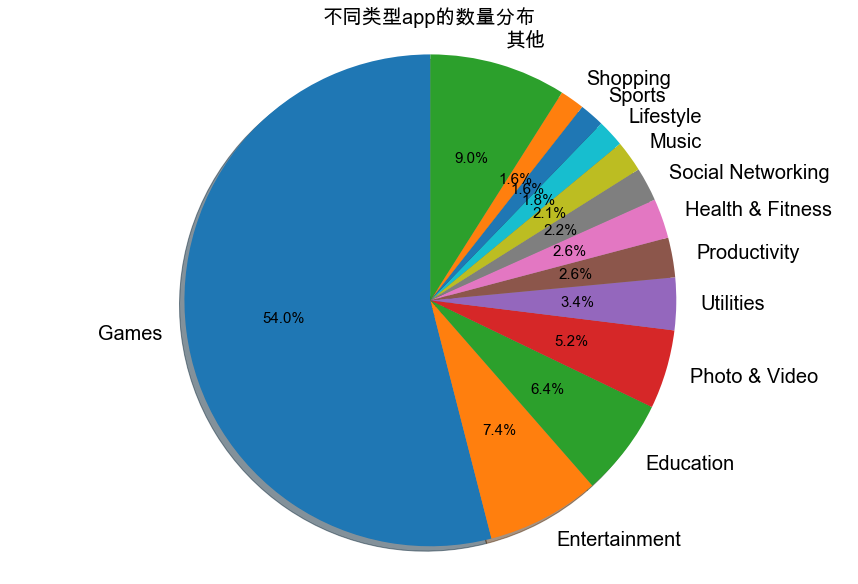

In [15]:
plt.figure(figsize=(15,10))
labels = a.index
#每个标签占多大，会自动去算百分比
sizes = a.values
# explode = (0.05,0,0)
patches,l_text,p_text = plt.pie(sizes,
#                                 explode=explode,
                                labels=labels,
                                labeldistance = 1.1,
                                autopct = '%3.1f%%',
                                shadow = True,
                                startangle = 90,
                                pctdistance = 0.6)

for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(15)
plt.axis('equal')
plt.title('不同类型app的数量分布',size=20)
plt.show()

结论：数据中含有6667款游戏，分为23种不同的类型，其中Games最多，有3600款，占比54.0%，其次是entertainment占比7.4%，education占比6.4%。说明Games目前受众最多，市场竞争最激烈。

### 2. app的评价

In [16]:
data21 = data.groupby("prime_genre")["rating_count_tot"].agg([np.sum,np.mean])
data21

,sum,mean
prime_genre,,
Book,573552.0,7647.360000
Business,248177.0,4595.870370
Catalogs,17325.0,1925.000000
Education,998120.0,2332.056075
Entertainment,3975519.0,8015.159274
Finance,912429.0,12499.027397
Food & Drink,877499.0,15394.719298
Games,51816806.0,14393.557222
Health & Fitness,1783330.0,10249.022989


In [17]:
data21_sort = data21.sort_values(by = "sum",ascending=False)
data21_sort

,sum,mean
prime_genre,,
Games,51816806.0,14393.557222
Social Networking,7592265.0,51299.087838
Photo & Video,5005175.0,14465.823699
Music,3979454.0,29047.109489
Entertainment,3975519.0,8015.159274
Shopping,2265528.0,21173.158879
Health & Fitness,1783330.0,10249.022989
Sports,1598618.0,14666.220183
Weather,1597034.0,22181.027778


In [18]:
data21_sort["mean"] = data21_sort["mean"]*100
data21_sort

,sum,mean
prime_genre,,
Games,51816806.0,1.439356e+06
Social Networking,7592265.0,5.129909e+06
Photo & Video,5005175.0,1.446582e+06
Music,3979454.0,2.904711e+06
Entertainment,3975519.0,8.015159e+05
Shopping,2265528.0,2.117316e+06
Health & Fitness,1783330.0,1.024902e+06
Sports,1598618.0,1.466622e+06
Weather,1597034.0,2.218103e+06


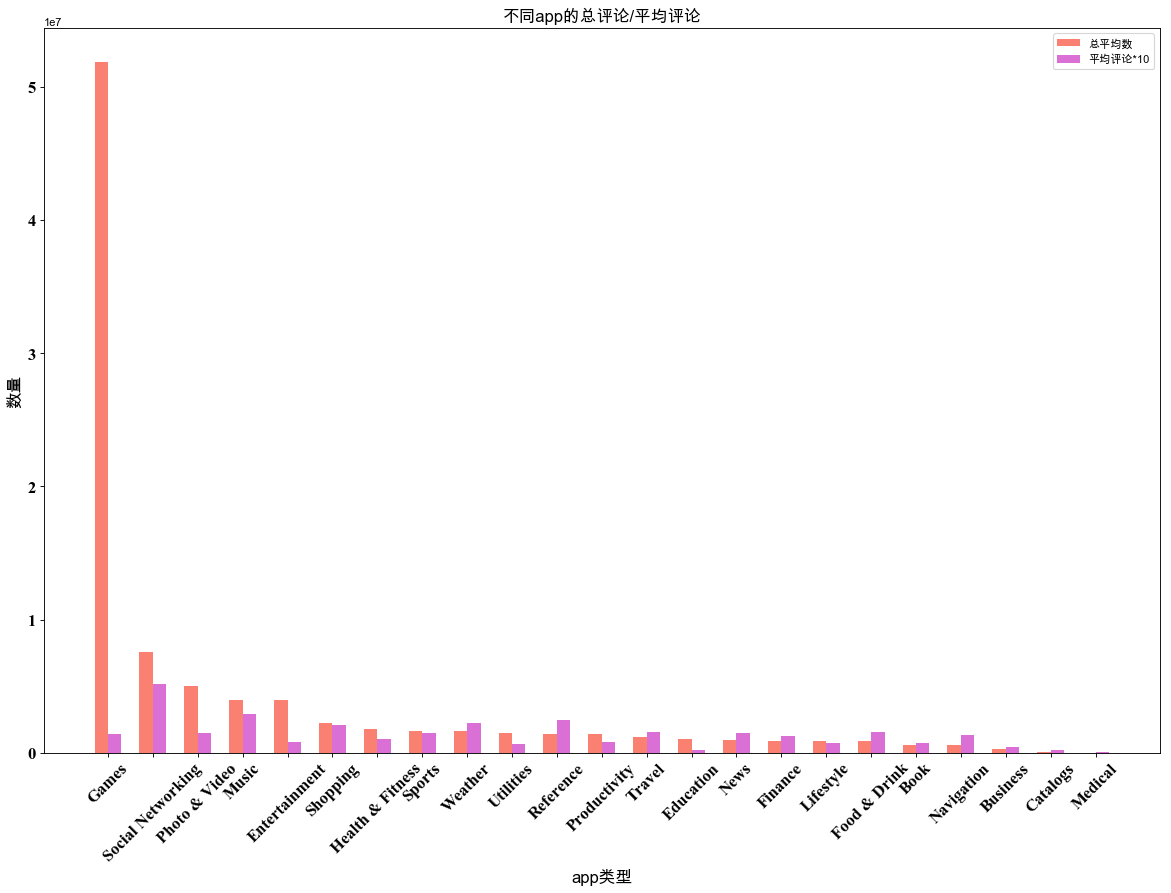

In [20]:
plt.figure(figsize=(18, 12), dpi=80)
x = np.arange(len(data21_sort))#柱状图在横坐标上的位置
y1 = list(data21_sort.values[:,0])
y2 = list(data21_sort.values[:,1])

bar_width = 0.3
tick_label = list(data21_sort.index)

plt.bar(x,y1,bar_width,color='salmon',label='总平均数')
plt.bar(x+bar_width,y2,bar_width,color='orchid',label='平均评论*10')

plt.xticks(x + bar_width/2,tick_label,rotation=45,fontproperties = 'Times New Roman',size = 15)#显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
plt.xlabel('app类型', size = 15)
plt.yticks(fontproperties = 'Times New Roman', size = 15)
plt.ylabel('数量', size = 15)
plt.title('不同app的总评论/平均评论', size = 15)
plt.legend(loc="upper right")
plt.show()

结论：评价数目最多的是Games类型App，总评价数超过5000w，但是其平均评论数很少。Social Network类型的App数量只有Games的14.7%，但是其平均评论数是Games的3.6倍，说明了Social Network类型App的社团性质。

### 3. 各类型中app评价数目最多的app

In [21]:
data3 = data.groupby('prime_genre').apply(lambda t: t[t.rating_count_tot == t.rating_count_tot.max()])
data3

,,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
prime_genre,,,,,,,,,,,,,,,,,
Book,82,302584613,"Kindle â€?Read eBooks, Magazines & Textbooks",169747456.0,USD,0.00,252076.0,80.0,3.5,4.5,5.11,4+,Book,37,5,9.0,1.0
Business,123,309735670,Indeed Job Search,3691520.0,USD,0.00,38681.0,563.0,4,4.5,4.3,4+,Business,37,3,28.0,1.0
Catalogs,3347,955286870,CPlus for Craigslist app - mobile classifieds,120219648.0,USD,0.00,13345.0,2788.0,5,5,3.0.0,17+,Catalogs,37,5,1.0,1.0
Education,1597,570060128,"Duolingo - Learn Spanish, French and more",89782272.0,USD,0.00,162701.0,1881.0,4.5,4.5,5.1.0,4+,Education,37,5,24.0,1.0
Entertainment,358,363590051,Netflix,125016064.0,USD,0.00,308844.0,139.0,3.5,3,9.21.3,4+,Entertainment,37,5,20.0,1.0
Finance,73,300238550,"Mint: Personal Finance, Budget, Bills & Money",162891776.0,USD,0.00,232940.0,683.0,4,4.5,5.9.0,4+,Finance,37,5,1.0,1.0
Food & Drink,209,331177714,Starbucks,135032832.0,USD,0.00,303856.0,7027.0,4.5,4.5,4.3.5,4+,Food & Drink,37,0,2.0,1.0
Games,1346,529479190,Clash of Clans,116476928.0,USD,0.00,2130805.0,579.0,4.5,4.5,9.24.12,9+,Games,38,5,18.0,1.0
Health & Fitness,265,341232718,Calorie Counter & Diet Tracker by MyFitnessPal,152700928.0,USD,0.00,507706.0,181.0,4.5,4.5,7.16,4+,Health & Fitness,37,5,19.0,1.0


In [22]:
data3.sort_values(by="rating_count_tot", ascending=False)

,,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
prime_genre,,,,,,,,,,,,,,,,,
Social Networking,16,284882215,Facebook,389879808.0,USD,0.00,2974676.0,212.0,3.5,3.5,95,4+,Social Networking,37,1,29.0,1.0
Photo & Video,519,389801252,Instagram,113954816.0,USD,0.00,2161558.0,1289.0,4.5,4,10.23,12+,Photo & Video,37,0,29.0,1.0
Games,1346,529479190,Clash of Clans,116476928.0,USD,0.00,2130805.0,579.0,4.5,4.5,9.24.12,9+,Games,38,5,18.0,1.0
Music,7,284035177,Pandora - Music & Radio,130242560.0,USD,0.00,1126879.0,3594.0,4,4.5,8.4.1,12+,Music,37,4,1.0,1.0
Reference,4,282935706,Bible,92774400.0,USD,0.00,985920.0,5320.0,4.5,5,7.5.1,4+,Reference,37,5,45.0,1.0
Health & Fitness,265,341232718,Calorie Counter & Diet Tracker by MyFitnessPal,152700928.0,USD,0.00,507706.0,181.0,4.5,4.5,7.16,4+,Health & Fitness,37,5,19.0,1.0
Weather,53,295646461,"The Weather Channel: Forecast, Radar & Alerts",199734272.0,USD,0.00,495626.0,5893.0,3.5,4.5,8.11,4+,Weather,37,0,33.0,1.0
Utilities,12,284815942,Google â€?Search made just for mobile,179979264.0,USD,0.00,479440.0,203.0,3.5,4,27,17+,Utilities,37,4,33.0,1.0
Travel,45,293622097,Google Earth,37214208.0,USD,0.00,446185.0,1359.0,3.5,3.5,7.1.6,4+,Travel,43,5,30.0,1.0


结论：可以看到，在所有app中，评论数最多的是属于Social Network的Facebook，说明它在社交网络中的热度最高；而评论总数最多的Games类App中，单个App评论数最多的是Clash of Clans，位于单个App评论数量的第3位。

### 4.1 App价格分布

In [23]:
data["currency"].unique()

array(['USD'], dtype=object)

In [24]:
data["price"].unique()

array([  3.99,   0.  ,   0.99,   9.99,   4.99,   7.99,   2.99,   1.99,
         5.99,  12.99, 249.99,   6.99,  74.99,  19.99,   8.99,  24.99,
        13.99,  14.99,  16.99,  47.99,  11.99,  59.99,  15.99,  27.99,
        17.99, 299.99,  49.99,  23.99,  20.99,  39.99,  99.99,  29.99,
        34.99,  18.99,  22.99])

对price进行分组，0定为0，0-1定为1， 1-10定为5，10-50定为25，50-100定为75，大于100定为100

In [25]:
#设置切分区域
listBins = [0, 0.1, 10, 50, 100, 1000000]

#设置切分后对应标签
listLabels = ['0','小于10','11-50','51-100','101及以上']

#利用pd.cut进行数据离散化切分
data['分组'] = pd.cut(data["price"], bins=listBins, labels=listLabels, include_lowest=True)

In [26]:
data

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,分组
0,281656475,PAC-MAN Premium,1.007882e+08,USD,3.99,21292.0,26.0,4,4.5,6.3.5,4+,Games,38,5,10.0,1.0,小于10
1,281796108,Evernote - stay organized,1.585787e+08,USD,0.00,161065.0,26.0,4,3.5,8.2.2,4+,Productivity,37,5,23.0,1.0,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",1.005240e+08,USD,0.00,188583.0,2822.0,3.5,4.5,5.0.0,4+,Weather,37,5,3.0,1.0,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",1.285120e+08,USD,0.00,262241.0,649.0,4,4.5,5.10.0,12+,Shopping,37,5,9.0,1.0,0
4,282935706,Bible,9.277440e+07,USD,0.00,985920.0,5320.0,4.5,5,7.5.1,4+,Reference,37,5,45.0,1.0,0
5,283619399,Shanghai Mahjong,1.048571e+07,USD,0.99,8253.0,5516.0,4,4,1.8,4+,Games,47,5,1.0,1.0,小于10
6,283646709,PayPal - Send and request money safely,2.277960e+08,USD,0.00,119487.0,879.0,4,4.5,6.12.0,4+,Finance,37,0,19.0,1.0,0
7,284035177,Pandora - Music & Radio,1.302426e+08,USD,0.00,1126879.0,3594.0,4,4.5,8.4.1,12+,Music,37,4,1.0,1.0,0
8,284666222,PCalc - The Best Calculator,4.925030e+07,USD,9.99,1117.0,4.0,4.5,5,3.6.6,4+,Utilities,37,5,1.0,1.0,小于10
9,284736660,Ms. PAC-MAN,7.002317e+07,USD,3.99,7885.0,40.0,4,4,4.0.4,4+,Games,38,0,10.0,1.0,小于10


In [27]:
data['分组'].value_counts()

0         3633
小于10      2945
11-50       82
51-100       5
101及以上       2
Name: 分组, dtype: int64

In [28]:
data['分组'].value_counts().index

CategoricalIndex(['0', '小于10', '11-50', '51-100', '101及以上'], categories=['0', '小于10', '11-50', '51-100', '101及以上'], ordered=True, dtype='category')

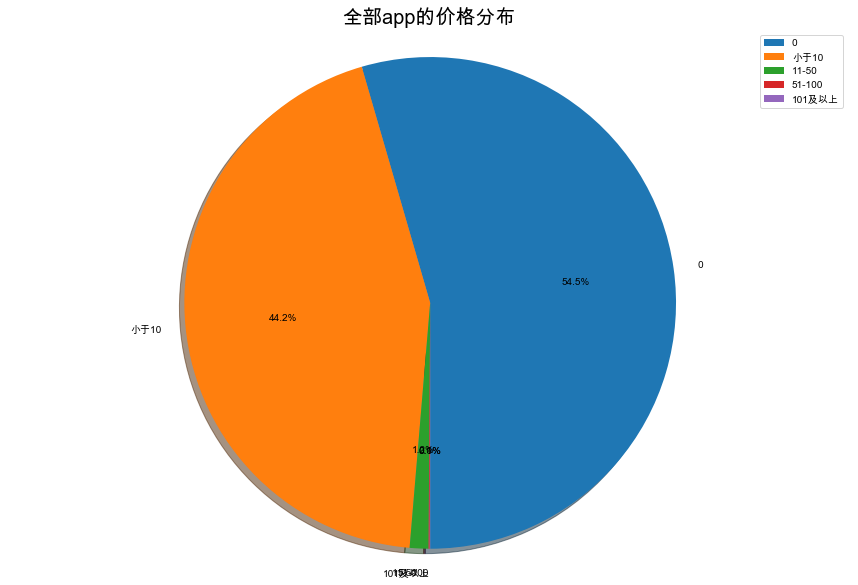

In [29]:
plt.figure(figsize=(15,10))
labels = data['分组'].value_counts().index
#每个标签占多大，会自动去算百分比
sizes = data['分组'].value_counts().values
# explode = (0.05,0,0)
patches,l_text,p_text = plt.pie(sizes,
#                                 explode=explode,
                                labels=labels,
                                labeldistance = 1.1,
                                autopct = '%3.1f%%',
                                shadow = True,
                                startangle = 270,
                                pctdistance = 0.6)

for t in l_text:
    t.set_size(10)
for t in p_text:
    t.set_size(10)
plt.axis('equal')
plt.title('全部app的价格分布',size=20)
plt.legend()
plt.show()

结论：免费App的占比是最多的，占全部App数量的54.5%，10美元以下的App占全部App数量的98.7%，总体趋势是收费越高，占比越低。

### 4.2 不同类型App价格分布

In [230]:
data42 = data.groupby(["prime_genre",'分组']).count()['price'].reset_index()
data42

,prime_genre,分组,price
0,Book,0,32.0
1,Book,小于10,42.0
2,Book,11-50,1.0
3,Book,51-100,NaN
4,Book,101及以上,NaN
5,Business,0,18.0
6,Business,小于10,33.0
7,Business,11-50,2.0
8,Business,51-100,1.0
9,Business,101及以上,NaN


In [247]:
data421 = data.groupby(["prime_genre"]).count()['price'].reset_index()
data421

,prime_genre,price
0,Book,75
1,Business,54
2,Catalogs,9
3,Education,428
4,Entertainment,496
5,Finance,73
6,Food & Drink,57
7,Games,3600
8,Health & Fitness,174
9,Lifestyle,119


In [249]:
type(data421)

pandas.core.frame.DataFrame

In [252]:
data421.rename(
    columns = {
        "prime_genre":"prime_genre",
        "price":"num"
    },
    inplace=True
)
data421

,prime_genre,num
0,Book,75
1,Business,54
2,Catalogs,9
3,Education,428
4,Entertainment,496
5,Finance,73
6,Food & Drink,57
7,Games,3600
8,Health & Fitness,174
9,Lifestyle,119


In [254]:
data422 = pd.merge(data42,data421,on = "prime_genre")
data422

,prime_genre,分组,price,num
0,Book,0,32.0,75
1,Book,小于10,42.0,75
2,Book,11-50,1.0,75
3,Book,51-100,NaN,75
4,Book,101及以上,NaN,75
5,Business,0,18.0,54
6,Business,小于10,33.0,54
7,Business,11-50,2.0,54
8,Business,51-100,1.0,54
9,Business,101及以上,NaN,54


In [255]:
data422["占比"] = data422["price"]/data422["num"]
data422

,prime_genre,分组,price,num,占比
0,Book,0,32.0,75,0.426667
1,Book,小于10,42.0,75,0.560000
2,Book,11-50,1.0,75,0.013333
3,Book,51-100,NaN,75,NaN
4,Book,101及以上,NaN,75,NaN
5,Business,0,18.0,54,0.333333
6,Business,小于10,33.0,54,0.611111
7,Business,11-50,2.0,54,0.037037
8,Business,51-100,1.0,54,0.018519
9,Business,101及以上,NaN,54,NaN


有上表可以看出每种类型的App中价格分布的占比

以 education 为例，看一下价格分布：

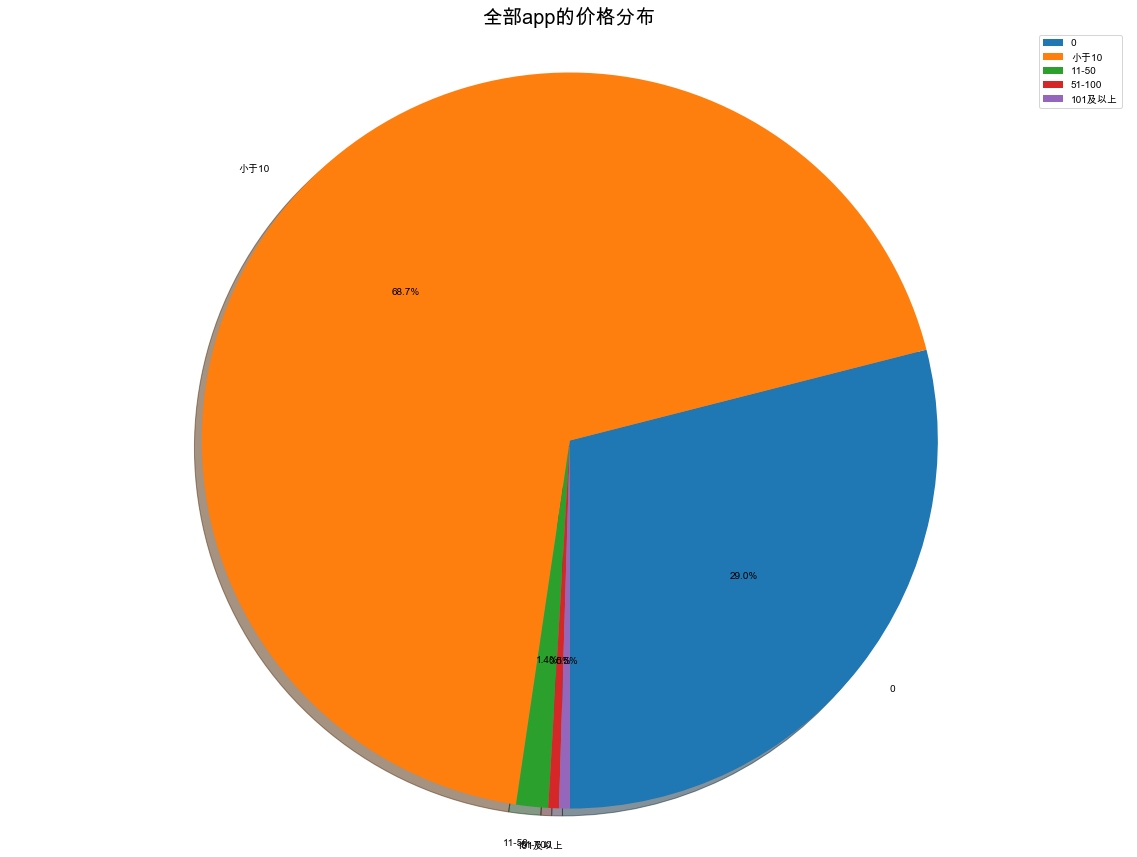

In [272]:
plt.figure(figsize=(20,15))
labels = data422[data422['prime_genre']=="Education"]["分组"].values
#每个标签占多大，会自动去算百分比
sizes = data422[data422['prime_genre']=="Education"]["占比"].values  
# explode = (0.05,0,0)
patches,l_text,p_text = plt.pie(sizes,
#                                 explode=explode,
                                labels=labels,
                                labeldistance = 1.1,
                                autopct = '%3.1f%%',
                                shadow = True,
                                startangle = 270,
                                pctdistance = 0.6)

for t in l_text:
    t.set_size(10)
for t in p_text:
    t.set_size(10)
plt.axis('equal')
plt.title('全部app的价格分布',size=20)
plt.legend()
plt.show()

总体来看，免费的App占总数的54.5%，超过一半，但在education类型的App中，收费的占了71%，说明大多数人愿意为了知识而付费。

### 5. 腾讯公司产品的表现情况

In [349]:
data

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,1.007882e+08,USD,3.99,21292.0,26.0,4,4.5,6.3.5,4+,Games,38,5,10.0,1.0
1,281796108,Evernote - stay organized,1.585787e+08,USD,0.00,161065.0,26.0,4,3.5,8.2.2,4+,Productivity,37,5,23.0,1.0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",1.005240e+08,USD,0.00,188583.0,2822.0,3.5,4.5,5.0.0,4+,Weather,37,5,3.0,1.0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",1.285120e+08,USD,0.00,262241.0,649.0,4,4.5,5.10.0,12+,Shopping,37,5,9.0,1.0
4,282935706,Bible,9.277440e+07,USD,0.00,985920.0,5320.0,4.5,5,7.5.1,4+,Reference,37,5,45.0,1.0
5,283619399,Shanghai Mahjong,1.048571e+07,USD,0.99,8253.0,5516.0,4,4,1.8,4+,Games,47,5,1.0,1.0
6,283646709,PayPal - Send and request money safely,2.277960e+08,USD,0.00,119487.0,879.0,4,4.5,6.12.0,4+,Finance,37,0,19.0,1.0
7,284035177,Pandora - Music & Radio,1.302426e+08,USD,0.00,1126879.0,3594.0,4,4.5,8.4.1,12+,Music,37,4,1.0,1.0
8,284666222,PCalc - The Best Calculator,4.925030e+07,USD,9.99,1117.0,4.0,4.5,5,3.6.6,4+,Utilities,37,5,1.0,1.0
9,284736660,Ms. PAC-MAN,7.002317e+07,USD,3.99,7885.0,40.0,4,4,4.0.4,4+,Games,38,0,10.0,1.0


In [350]:
data5 = data[data["track_name"].str.contains("QQ")]
data5

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
403,370139302,QQ æµ__?____»ã___è¯´æ¼«_»ã__è§_,119812096.0,USD,0.0,1750.0,19.0,3.5,5,7.4.1,17+,Utilities,38,0,1.0,1.0
496,387109554,QQå®__ä¸_,32918528.0,USD,0.0,308.0,0.0,3.5,0,6.9.8,17+,Utilities,37,0,1.0,1.0
514,389481236,"QQ___©æ_-_°æ_ä¸___ºå_å¤_·¥_?,72941568,USD""",0.0,746,1.0,4.5,5.0,6.7.8,4+,Utilities,40,0,1,1,NaN,NaN
680,414603431,"QQ_³ä_-_¥è______°ã__³ä__?,154551296,USD""",0.0,745,7.0,3.5,5.0,7.5,4+,Music,37,0,3,1,NaN,NaN
740,426097375,QQæµ___D-____ç´¢æ_è§__,82982912.0,USD,0.0,936.0,4.0,4,4,5.8.2,17+,Utilities,24,5,1.0,1.0
760,429885089,QQ_³ä_HD,139457536.0,USD,0.0,224.0,4.0,3.5,5,5.3.1,4+,Music,24,5,3.0,1.0
857,444934666,QQ,218936320.0,USD,0.0,9109.0,17.0,3,1.5,7.0.1,12+,Social Networking,37,0,1.0,1.0
907,453718989,QQ HD,118249472.0,USD,0.0,5058.0,0.0,3.5,0,6.6.1,4+,Social Networking,24,5,1.0,1.0
922,456229650,QQæ¸¸æ_å¤§å_HD,20161086.0,USD,0.0,338.0,176.0,3.5,3.5,1.4,4+,Entertainment,26,5,1.0,1.0
1011,473225145,QQ_,110243840.0,USD,0.0,281.0,1.0,3.5,1,5.3.0,4+,Utilities,38,0,1.0,1.0


In [351]:
data5.sort_values(by = "rating_count_tot", ascending=False)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
857,444934666,QQ,218936320.0,USD,0.0,9109.0,17.0,3,1.5,7.0.1,12+,Social Networking,37,0,1.0,1.0
907,453718989,QQ HD,118249472.0,USD,0.0,5058.0,0.0,3.5,0,6.6.1,4+,Social Networking,24,5,1.0,1.0
403,370139302,QQ æµ__?____»ã___è¯´æ¼«_»ã__è§_,119812096.0,USD,0.0,1750.0,19.0,3.5,5,7.4.1,17+,Utilities,38,0,1.0,1.0
740,426097375,QQæµ___D-____ç´¢æ_è§__,82982912.0,USD,0.0,936.0,4.0,4,4,5.8.2,17+,Utilities,24,5,1.0,1.0
922,456229650,QQæ¸¸æ_å¤§å_HD,20161086.0,USD,0.0,338.0,176.0,3.5,3.5,1.4,4+,Entertainment,26,5,1.0,1.0
496,387109554,QQå®__ä¸_,32918528.0,USD,0.0,308.0,0.0,3.5,0,6.9.8,17+,Utilities,37,0,1.0,1.0
1011,473225145,QQ_,110243840.0,USD,0.0,281.0,1.0,3.5,1,5.3.0,4+,Utilities,38,0,1.0,1.0
2201,710380093,QQ International,103233536.0,USD,0.0,274.0,0.0,2,0,4.8.4,4+,Social Networking,38,0,8.0,1.0
760,429885089,QQ_³ä_HD,139457536.0,USD,0.0,224.0,4.0,3.5,5,5.3.1,4+,Music,24,5,3.0,1.0
2684,880859615,QQ_HD,146654208.0,USD,0.0,55.0,1.0,3,3,3.1,4+,Utilities,24,4,1.0,1.0


# 4. 总结

1. 本数据中共有6667款App，分为23种不同的类型，其中有3600款属于Games，占比54%，其他类型App单个类型不超过500个，说明Games类型受众最广，市场竞争最激烈。    
2. 从评价数来看，Games类评价最多，超过5000w条，但是平均每款Games类App的评价只有14393条，而Social Network类型的App数量只有Games的14.7%，但是其平均评论数是Games的3.6倍，说明了Social Network类型App具有社团性质。  
3. 从不同类型的App评价数排名可以看出，在Social Networking领域，Facebook作为世界最大的社交网络平台活跃度很高。  
4. 从收费情况来看，免费的App占总数的54.5%，超过一半，但在education类型的App中，收费的占了71%，说明大多数人愿意为了知识而付费。